## TF Lite Breast Cancer Detection Week 4: Make Data Model Ready
### Yinda Chen and Alice Tang

This week's notebook will focus on data processing and preparing the data so it is "model ready". Essentially, we'll work on cleaning the data before we attempt any future modeling.

#### Let's get started, shall we?

To preface, the dataset can be found here: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset. It can also be found in the "data" folder of this repository.

Note: For the image EDA, we are using a subset of 250 photos in total (2 photos from 100 train images and 25 test images) due to GitHub's memory constraints.  

**This marks the beginning of the week 4 assignment.**

We'll start off by importing any needed packages.

In [1]:
# Importing needed packages.
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

Next, we'll load up the datasets!

In [2]:
# Getting the current working directory where the script is being executed.
# This line finds the absolute path of the current script and then gets the directory containing the script. 
# This helps construct paths relative to location of script, so anyone can run it!
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
# Essentially we're going up one level from current directory, and then accessing the 'data' directory where our files will be located.
data_dir = os.path.join(current_dir, '../data') 

# We're now ready to read the CSV files of our data! 
calc_test = pd.read_csv(os.path.join(data_dir, 'calc_case_description_test_set.csv'))
calc_train = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))
mass_test = pd.read_csv(os.path.join(data_dir, 'mass_case_description_test_set.csv'))
mass_train = pd.read_csv(os.path.join(data_dir, 'mass_case_description_train_set.csv'))

# Checking to see if everything loaded correctly.
calc_test.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [3]:
# Getting the current working directory where the script is being executed.
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
data_dir = os.path.join(current_dir, '../data') 
extracted_dir = os.path.join(data_dir, 'extracted')  # Accessing the 'extracted' folder

# List the files in the extracted folder to ensure it's available
if os.path.exists(extracted_dir):
    files_in_extracted = os.listdir(extracted_dir)
    print('Files in extracted folder:', files_in_extracted)
    
    # Now try to read the dicom_info.csv file
    dicom_csv_path = os.path.join(extracted_dir, 'dicom_info.csv')
    
    if os.path.exists(dicom_csv_path):
        dicom_data = pd.read_csv(dicom_csv_path)
        print('Successfully loaded dicom_info.csv:')
        print(dicom_data.head(10))
    else:
        print("dicom_info.csv does not exist in the extracted folder.")
else:
    print("The 'extracted' folder does not exist in the 'data' folder.")

Files in extracted folder: ['meta.csv', '.ipynb_checkpoints', 'dicom_info.csv']
Successfully loaded dicom_info.csv:
                                           file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
5  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
6  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
7  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
8  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
9  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.26721

In [4]:
# Showing the information of dicom_info.csv to check if it loaded correctly.
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


Awesome! We've successfully loaded in the data. Now we're ready to start cleaning the data. 

### To start, we'll handle the data cleaning in dicom_info.csv!

In [5]:
# Checking basic df information which will help inform us better on what we need to do. 
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
# Changing the directory in the dicom_info.csv in order to load the images correctly.
image_dir = '../data/jpeg'

# Filtering dataset by SeriesDescription, where three separate dfs will be created where the SeriesDescription column matches "full mammogram images", "cropped images", and "ROI mask images".
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

# Updating the image paths for their respective image sets.
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

# Previewing the updated paths to ensure everything looks correct.
full_mammogram_images.head()

1     ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.24838674...
2     ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.26721317...
11    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.21039689...
12    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658...
15    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885...
Name: image_path, dtype: object

In [7]:
# Here, we are copying and cleaning the entire dataframe. 
dicom_cleaning_data = dicom_data.copy() # This is done to preserve the original data. 
dicom_cleaning_data['image_path'] = dicom_cleaning_data['image_path'].str.replace('CBIS-DDSM/jpeg/', '../data/jpeg/') # Updating the image path column.

# Verifying that all image paths have been cleaned and updated!
dicom_cleaning_data.head() 

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,../data/jpeg/1.3.6.1.4.1.9590.100.1.2.12930872...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,../data/jpeg/1.3.6.1.4.1.9590.100.1.2.24838674...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,../data/jpeg/1.3.6.1.4.1.9590.100.1.2.26721317...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,../data/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,../data/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


Looks good. Let's move onto dropping any of the unnecesssary columns. 

To preface, we decided to drop these specific columns as they do not offer any sort of valuable information and would only contribute to the noise in our dataset, which would be highly detrimental to our model. 

In [8]:
# Dropping any unnecessary columns.
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
# We'll check the df information to ensure these columns were dropped.
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [9]:
# Let's check more closely for the NA values.
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

Looks like we have 566 missing values in both "Laterality" and "SeriesDescription". No worries! We'll fill it in using the backwards fill method. We found that this method is often used in medical datasets, as it allows for as much data retention as possible.

In [10]:
# Filling in the NAs.
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

# Ensuring that there are no more NA values.
dicom_cleaning_data.isna().sum()

/tmp/ipykernel_2818980/421465253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/421465253.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/421465253.py:3: FutureWarning: A value is trying to be set on a copy o

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

Awesome! Looks like all of the missing values were filled successfully. We've also dropped any irrelevant columns which, in turn, reduces the data size and simplifies the dataset.

### Great, let's move onto cleaning the calc_case train set.

In [11]:
# Start by creating a deep copy of the calc_train df, so none of the Data_cleaning_1 changes will affect the original dataframe.
Data_cleaning_1 = calc_train.copy()
# Checking basic information of the df to see what we may need to change. 
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

Looking at this, we can see that "pathology", "calc type", "calc distribution", "abnormality type", "image view", and "left or right breast" are of object class, but they are categorical variables. Let's change this, shall we?

In [12]:
# Changing the types of the columns to category.
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc type'] = Data_cleaning_1['calc type'].astype('category')
Data_cleaning_1['calc distribution'] = Data_cleaning_1['calc distribution'].astype('category')
Data_cleaning_1['abnormality type'] = Data_cleaning_1['abnormality type'].astype('category')
Data_cleaning_1['image view'] = Data_cleaning_1['image view'].astype('category')
Data_cleaning_1['breast density'] = Data_cleaning_1['breast density'].astype('category')
Data_cleaning_1['left or right breast'] = Data_cleaning_1['left or right breast'].astype('category')

# Ensure that the data types look correct for each variable.
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast density           1546 non-null   category
 2   left or right breast     1546 non-null   category
 3   image view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality type         1546 non-null   category
 6   calc type                1526 non-null   category
 7   calc distribution        1170 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [13]:
# Filling in the NA values.
Data_cleaning_1.isna().sum()

patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [14]:
# Filling in missing values with bfill method.
Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
# Check and confirm if there are any missing values. 
Data_cleaning_1.isna().sum()

/tmp/ipykernel_2818980/968967029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/968967029.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/968967029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series 

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

Great, there are no more missing values! Now, we're going to address the categorical columns through One-Hot Encoding.

In [15]:
# Checking the categorical columns again that we need to address.
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast density           1546 non-null   category
 2   left or right breast     1546 non-null   category
 3   image view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality type         1546 non-null   category
 6   calc type                1546 non-null   category
 7   calc distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [16]:
# Performing One-Hot Encoding on categorical columns.
Data_cleaning_1_ohe = pd.get_dummies(Data_cleaning_1, columns=['pathology', 'calc type', 'calc distribution', 
                                                               'abnormality type', 'image view', 
                                                               'breast density', 'left or right breast'], 
                                     drop_first=True) # drop_first=True to avoid multicollinearity in linear models

# Checking the new df structure.
Data_cleaning_1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   patient_id                                                          1546 non-null   object
 1   abnormality id                                                      1546 non-null   int64 
 2   assessment                                                          1546 non-null   int64 
 3   subtlety                                                            1546 non-null   int64 
 4   image file path                                                     1546 non-null   object
 5   cropped image file path                                             1546 non-null   object
 6   ROI mask file path                                                  1546 non-null   object
 7   pathology_BENIGN_WITHOUT

Awesome. We can see that we have a total of 66 columns, because each categorical feature we applied OHE to, multiple binary columns have been created. All of the OHE columns are of the type "bool", which is correct because each column represents the presence (True) or absence (False) of a particular category.

### Great, we're ready to move onto the mass_case train set! We'll repeat the same process for calc_train above. 

In [17]:
# Defining "Data_cleaning_2" which will represent the mass_train dataset.
Data_cleaning_2 = mass_train

In [18]:
# Checking the info.
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [19]:
# Renaming column for uniformity with the calc_train df. 
Data_cleaning_2 = Data_cleaning_2.rename(columns={'breast_density':'breast density'})

In [20]:
# Change the types of the columns to category
Data_cleaning_2['left or right_breast'] = Data_cleaning_2['left or right breast'].astype('category')
Data_cleaning_2['image view'] = Data_cleaning_2['image view'].astype('category')
Data_cleaning_2['mass margins'] = Data_cleaning_2['mass margins'].astype('category')
Data_cleaning_2['mass shape'] = Data_cleaning_2['mass shape'].astype('category')
Data_cleaning_2['abnormality type'] = Data_cleaning_2['abnormality type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2['breast density'] = Data_cleaning_2['pathology'].astype('category')

In [21]:
# Fillling the NA values.
Data_cleaning_2.isna().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
left or right_breast        0
dtype: int64

In [22]:
# Using bfill again to fill in the missing values. 
Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

/tmp/ipykernel_2818980/3425235835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/3425235835.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_2818980/3425235835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Se

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
left or right_breast       0
dtype: int64

In [23]:
# Checking df info to see which variables we will need to OHE. 
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast density           1318 non-null   category
 2   left or right breast     1318 non-null   object  
 3   image view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality type         1318 non-null   category
 6   mass shape               1318 non-null   category
 7   mass margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
 14  left or 

In [24]:
# Ensuring the relevant columns are categorical.
categorical_columns = ['left or right breast', 'image view', 'mass margins', 'mass shape', 'abnormality type', 'pathology', 'breast density']
for col in categorical_columns:
    Data_cleaning_2[col] = Data_cleaning_2[col].astype('category')

# Performing One-Hot Encoding.
Data_cleaning_2_ohe = pd.get_dummies(Data_cleaning_2, columns=categorical_columns, drop_first=True)

# Checking the new df structure.
Data_cleaning_2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 45 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   patient_id                                           1318 non-null   object  
 1   abnormality id                                       1318 non-null   int64   
 2   assessment                                           1318 non-null   int64   
 3   subtlety                                             1318 non-null   int64   
 4   image file path                                      1318 non-null   object  
 5   cropped image file path                              1318 non-null   object  
 6   ROI mask file path                                   1318 non-null   object  
 7   left or right_breast                                 1318 non-null   category
 8   left or right breast_RIGHT                           1318 

Cool, now we have 45 columns in total, so the df has expanded quite a bit due to OHE. Hopefully we can cut some of these features down next week with feature engineering, since we don't want there to be tthe curse of dimensionality or any overfitting.

### We've done dicom_info, calc_case, and mass_case. Now we'll have to address the image data. Let's move onto processsing the image data!

In [25]:
# Get the Pathology of the image

def get_pathology(file_path, dicom_df, n):
    # n means the type of images. 0 means full mammogram images, 1 means cropped images, 2 means ROI masked images.
    
    patient_row = dicom_df[dicom_df['image_path'] == file_path] # finds the patient ID
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
    else:
        return "No matching PatientID found for the given image path"
    
    if 'Calc-Training' in patient_id: # Selecting appropriate dataframe
        df = Data_cleaning_1
    elif 'Mass-Training' in patient_id:
        df = Data_cleaning_2
    elif 'Calc-Test' in patient_id:
        df = calc_test
    elif 'Mass-Test' in patient_id:
        df = mass_test
    else:
        return "No Pathology"
    
    # if patient_id.endswith('_1') or patient_id.endswith('_2'):
    #     patient_id = patient_id[:-2]

    if n == 0: # finding the matching rows
        matching_rows = df[df['image file path'].str.contains(patient_id, na=False)]
    elif n == 1:
        matching_rows = df[df['cropped image file path'].str.contains(patient_id, na=False)]
    elif n == 2:
        matching_rows = df[df['ROI mask file path'].str.contains(patient_id, na=False)]
    # pathology_value = matching_rows['pathology'].values[0]
    pathology_value = matching_rows['pathology'].values[0]
    return pathology_value

In [26]:
# Create a function that show different kinds of images and their pathology.
# input n, 0 means full mammogram images, 1 means cropped images, 2 means ROI masked images.
def show(n):
    
    if n not in[0, 1, 2]:
        raise ValueError("Input must be 0, 1, or 2.")
    
    for i in range(5):
        if n == 0:
            path = full_mammogram_images
            print('These are 5 full mammogram images')
        elif n == 1:
            path = cropped_images
            print('These are 5 cropped images')
        else:
            path = roi_mask_images
            print('These are 5 ROI masked images')
        image_path = path.values[i]
        pathology = get_pathology(image_path, dicom_cleaning_data, n)
        try:
            img = mpimg.imread(image_path)
            plt.imshow(img, cmap='gray')
            plt.title(f'Pathology: {pathology}')
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {image_path} not found.")

These are 5 cropped images


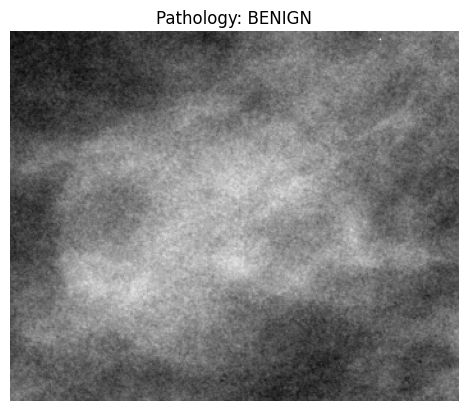

These are 5 cropped images


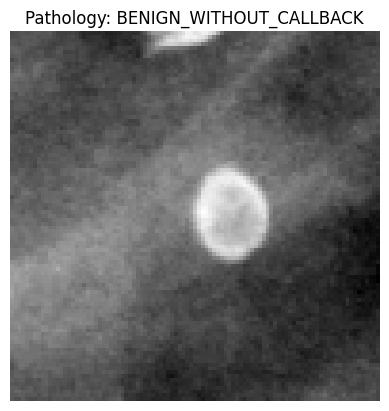

These are 5 cropped images


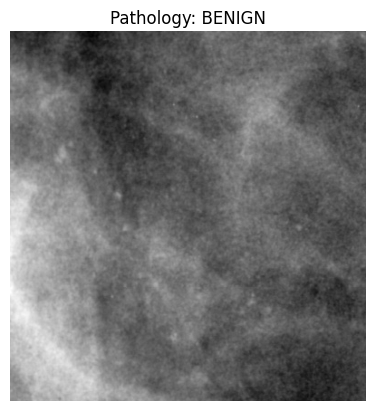

These are 5 cropped images


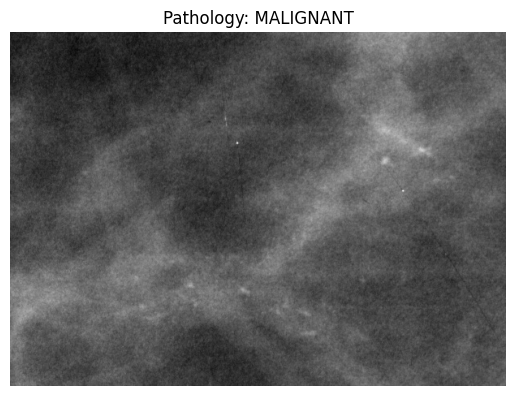

These are 5 cropped images


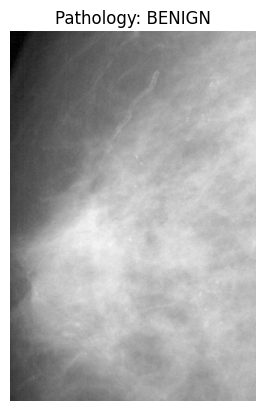

In [27]:
show(1)

Great! So from this, we're able to retrieve and display the pathology information related to mammograms from a dataset, so we're able to visually inspect the images along their diagnoses. 

In [28]:
# Counting the number of images in different categories.
len(full_mammogram_images)
fmi_train, fmi_test, ci_train, ci_test, rmi_train, rmi_test = 0,0,0,0,0,0
for i in range(len(full_mammogram_images)):
    file_path = full_mammogram_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            fmi_train += 1
        if 'Test' in patient_id:
            fmi_test += 1
    else:
        break

for i in range(len(cropped_images)):
    file_path = cropped_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            ci_train += 1
        if 'Test' in patient_id:
            ci_test += 1
    else:
        break

for i in range(len(roi_mask_images)):
    file_path = roi_mask_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            ci_train += 1
        if 'Test' in patient_id:
            ci_test += 1
    else:
        break

train = fmi_train + ci_train + rmi_train
test = fmi_test + ci_test + rmi_test

# Printing total counts of training and testing images.
print(train, test)

8184 1487


### Next, let's move on to process the full mammogram images.

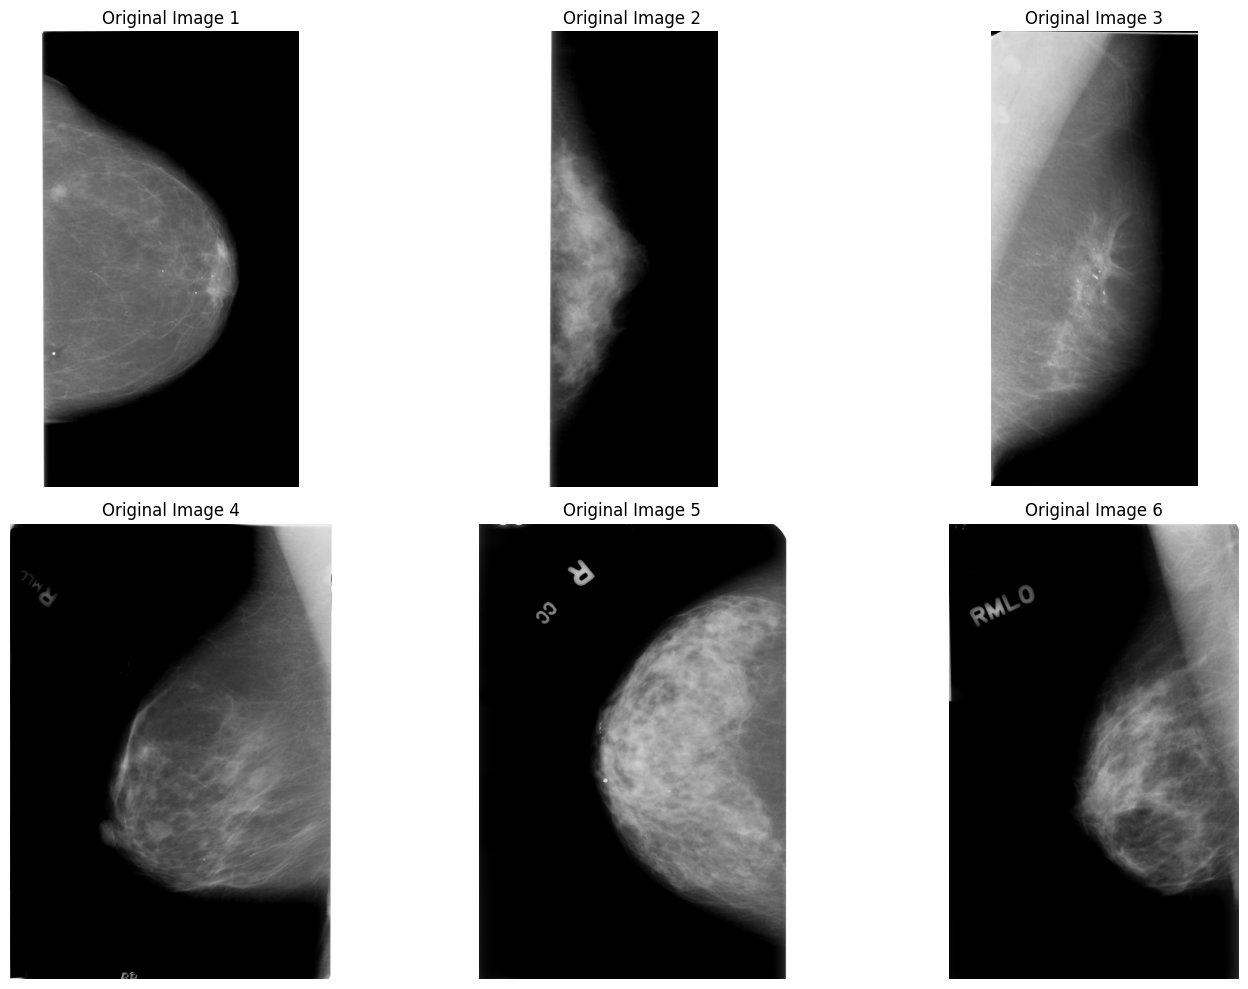

In [29]:
import cv2

# Show some full mammogram images
images = []
for i in range(6):
    image = cv2.imread(full_mammogram_images.values[i])
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1}')
plt.tight_layout()
plt.show()

In [30]:
# Resizing all the images
target_size = (256, 384)

def resize_image(image, target_size):
    
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [31]:
# Definining the preprocessing function for mammogram images.
def preprocess_mammogram(image):
    # 1. Converting the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) for contrast enhancement.
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)

    # 3. Applying median blur for noise reduction.
    denoised_image = cv2.medianBlur(enhanced_image, 3)
    
    # 4. Normalizing the image to the range [0, 1].
    normalized_image = denoised_image / 255.0
    
    return normalized_image

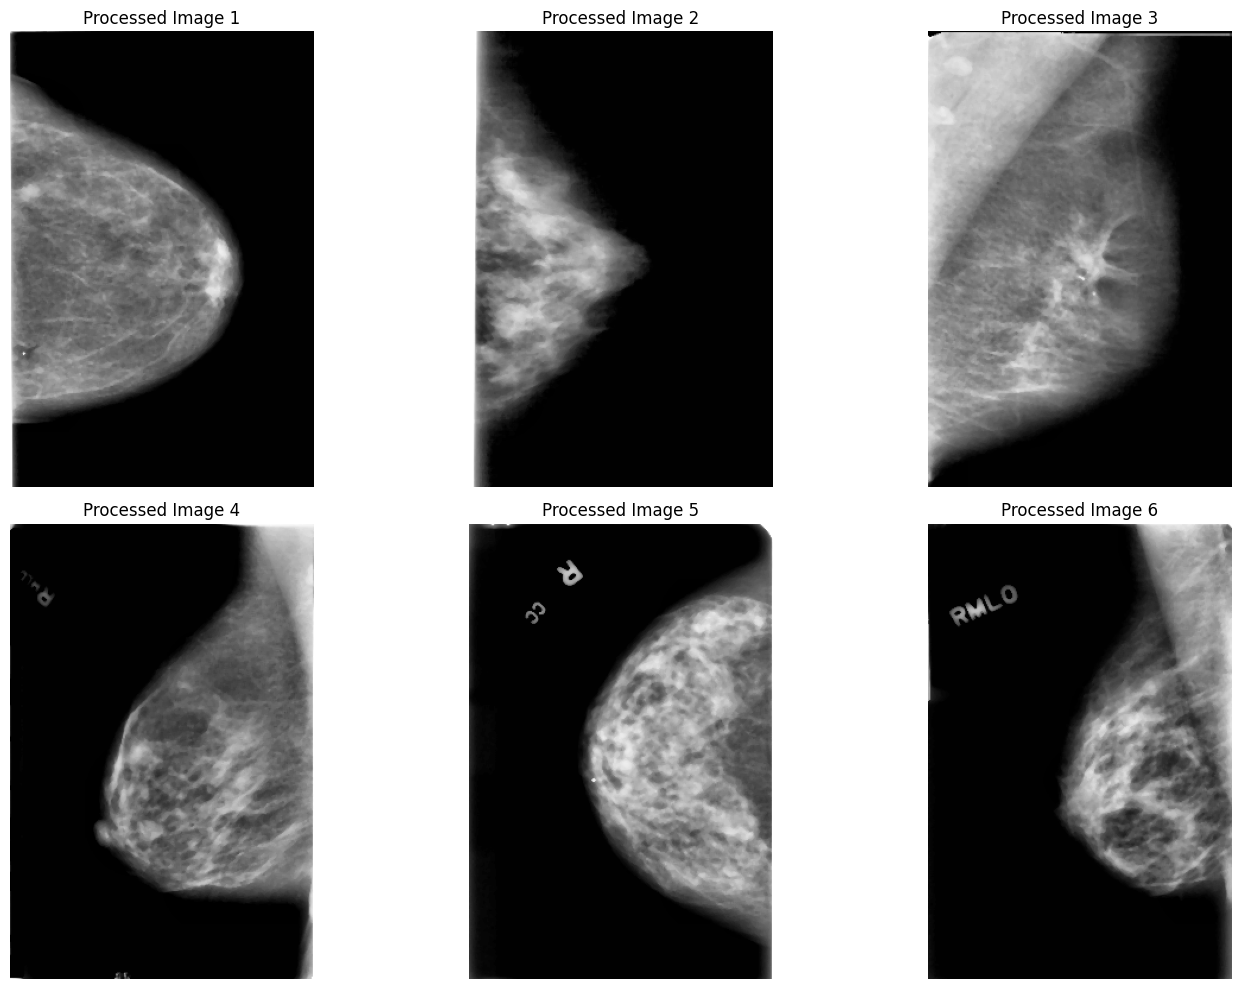

In [32]:
images = []
for i in range(6):
    image = cv2.imread(full_mammogram_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_mammogram(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

### Next, we'll move on to processing the cropped images.

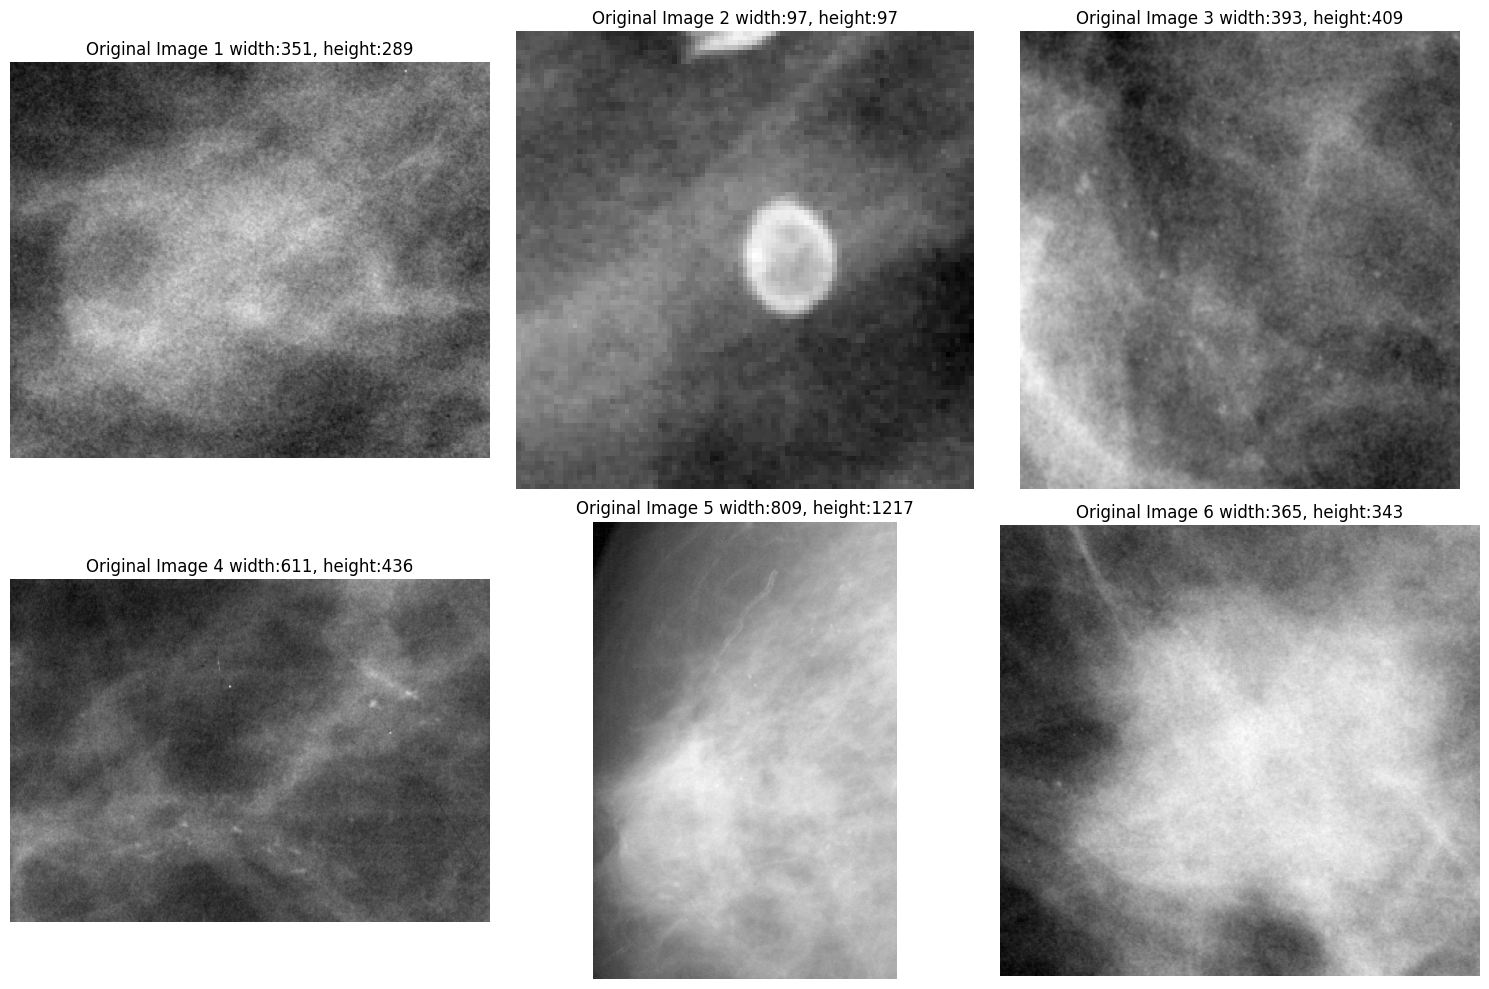

In [33]:
# Showing some cropped images and their original size.
images = []
widths = []
heights = []
def get_image_size(image):
    if image is not None:
        height, width = image.shape[:2]  # Getting height and width.
        return (width, height)  # Returning as (width, height).
    else:
        return None

for i in range(6):
    image = cv2.imread(cropped_images.values[i])
    width, height = get_image_size(image)
    images.append(image)
    widths.append(width)
    heights.append(height)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1} width:{widths[idx]}, height:{heights[idx]}')
plt.tight_layout()
plt.show()

In [34]:
def preprocess_cropped_image(image):
    # 1. Convert to grayscale (remove color channels).
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Gaussian blur to reduce image noise and detail (smooth out the image).
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # 3. Histogram equalization to enhance the contrast of the image.
    equalized_image = cv2.equalizeHist(blurred_image)
    
    # 4. Normalize pixel values to range [0, 1].
    normalized_image = equalized_image / 255.0

    return normalized_image

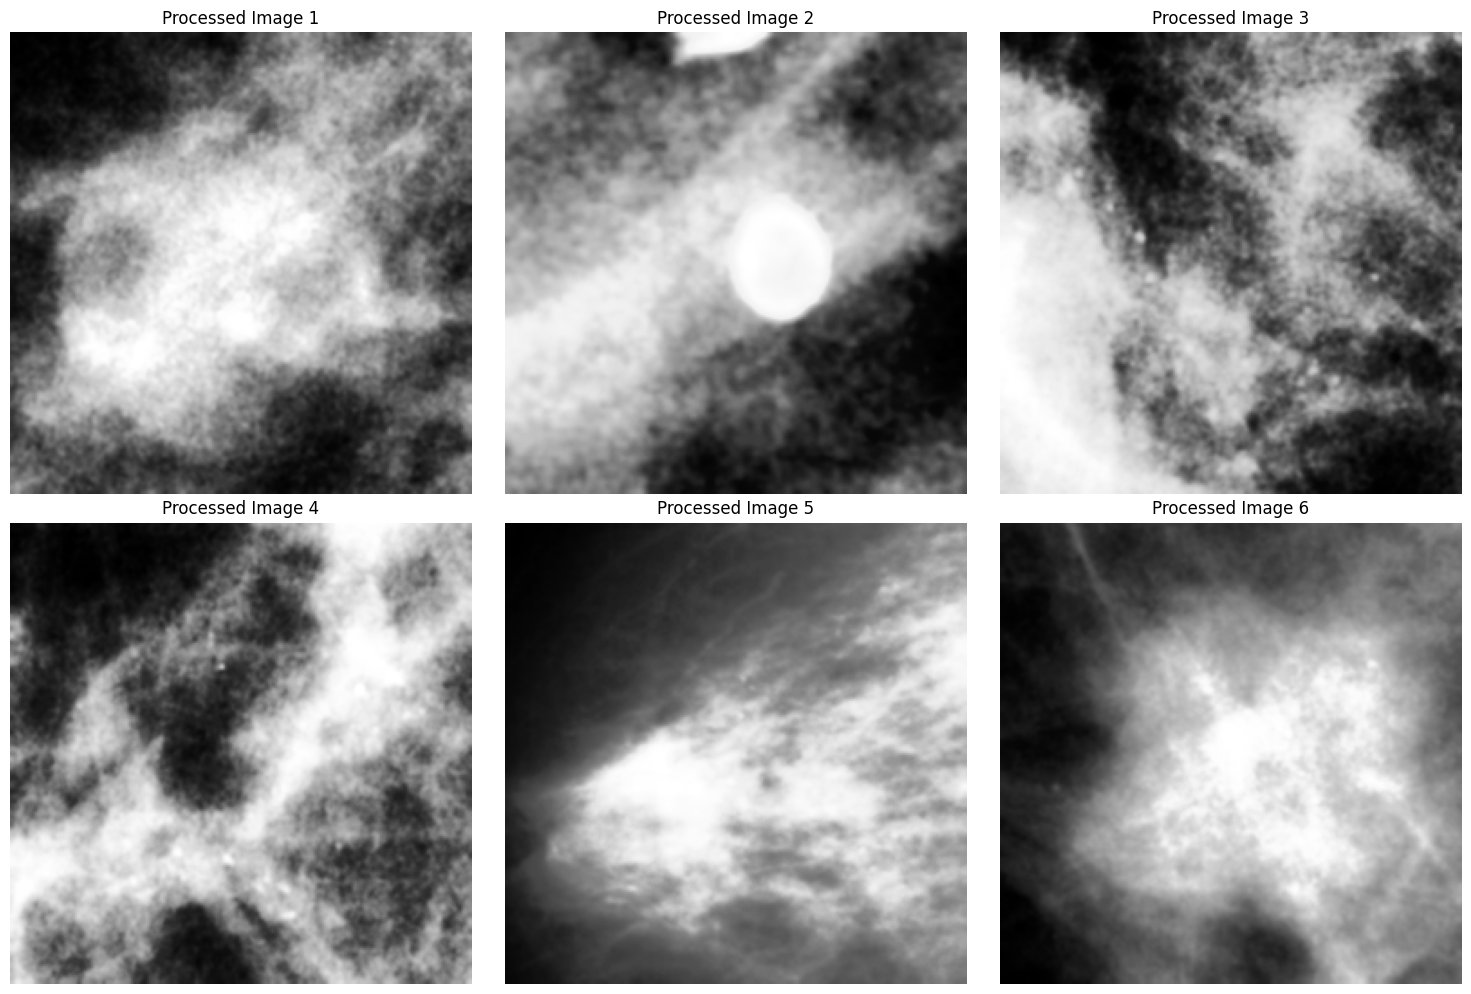

In [35]:
target_size = (256, 256)

images = []
for i in range(6):
    image = cv2.imread(cropped_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_cropped_image(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

### Now, we will process the ROI masked images.

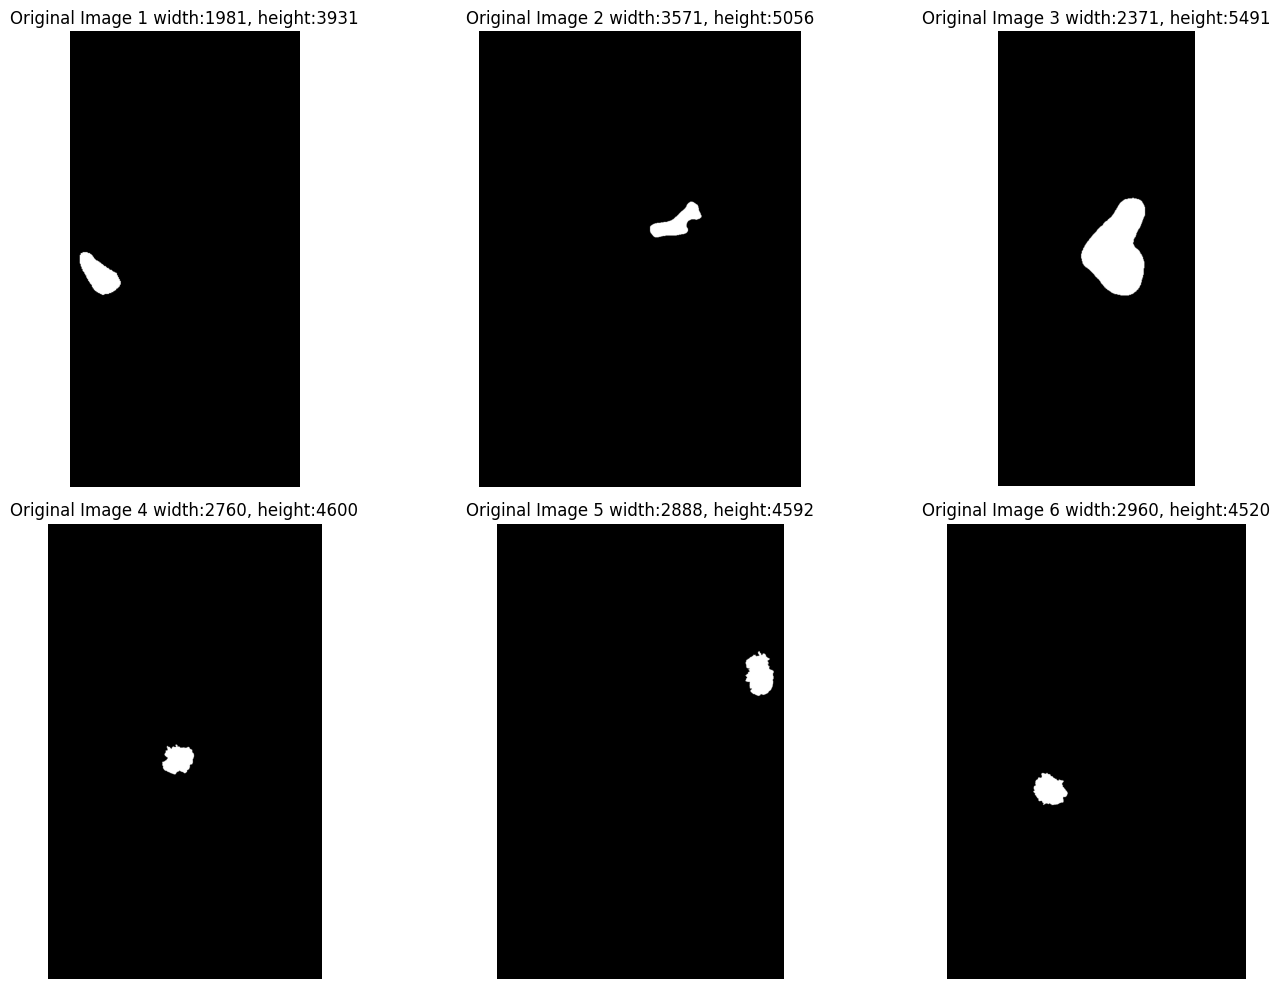

In [36]:
# Showing some ROI masked images and their original size.
images = []
widths = []
heights = []
def get_image_size(image):
    if image is not None:
        height, width = image.shape[:2]  # Getting height and width.
        return (width, height)  # Returning as (width, height).
    else:
        return None

for i in range(6):
    image = cv2.imread(roi_mask_images.values[i])
    width, height = get_image_size(image)
    images.append(image)
    widths.append(width)
    heights.append(height)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1} width:{widths[idx]}, height:{heights[idx]}')
plt.tight_layout()
plt.show()

In [37]:
import numpy as np

def preprocess_roi_image(image):
    # 1. Converting to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Binarizing the image (convert to pure black and white).
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    # 3. Morphological operations to remove noise (using opening operation).
    kernel = np.ones((5, 5), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # 4. Normalizing the pixel values to range [0, 1].
    normalized_image = cleaned_image / 255.0

    return normalized_image

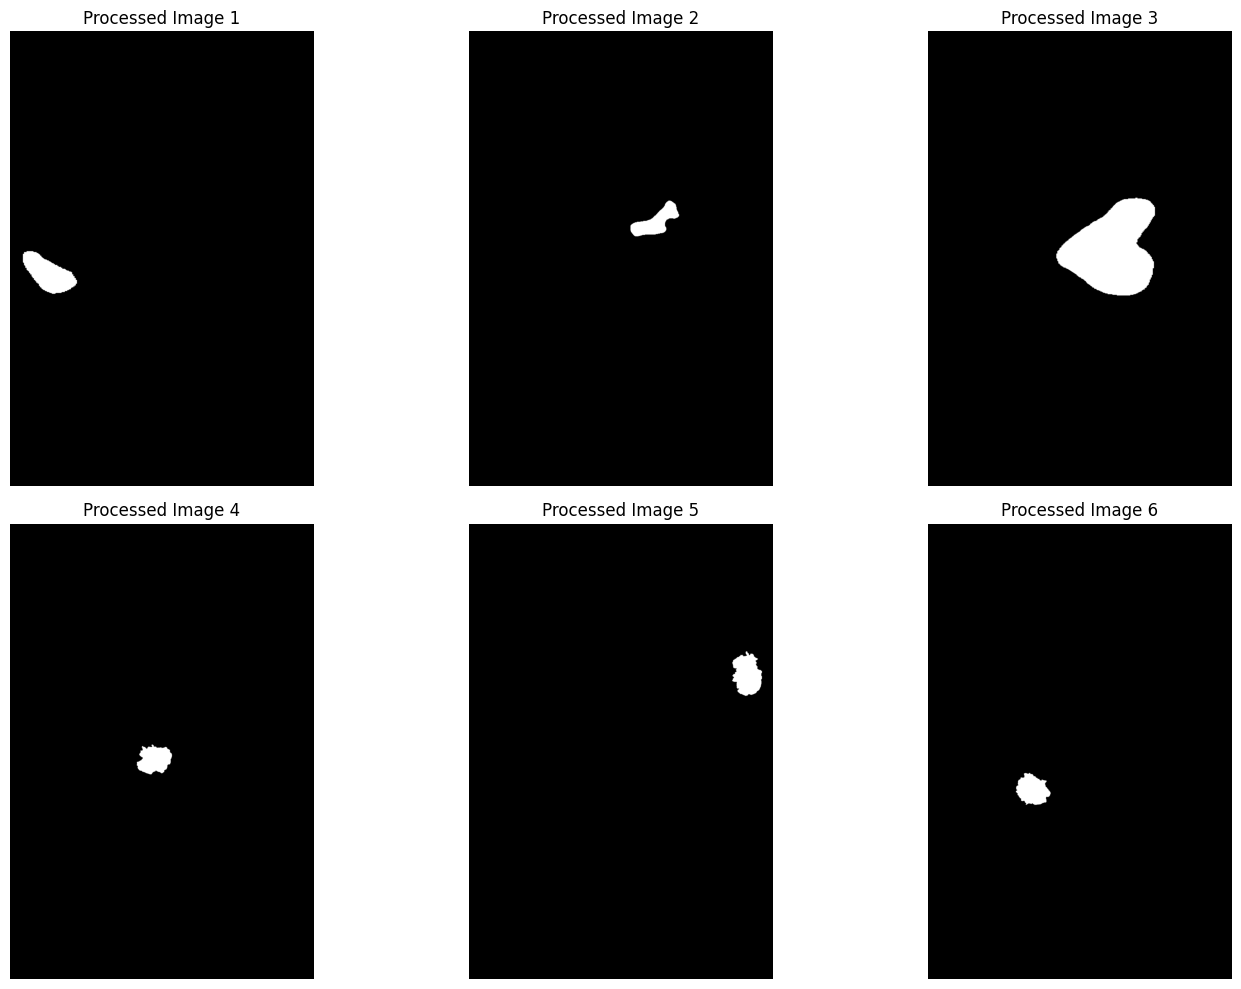

In [38]:
target_size = (2400, 3600)

images = []
for i in range(6):
    image = cv2.imread(roi_mask_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_roi_image(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

Great! We're done with the data preprocessing. To reiterate, we've cleaned and standardized the data for dicom_info, calc_case, mass_case, as well as doing some image processing techniques for the image data. Next week, we'll delve into feature engineering using these clean datasets!

**This marks the end of the week 4 assignment.**